In [131]:
import json
import pennylane as qml
import pennylane.numpy as np

dev = qml.device("default.qubit", wires = 5)

@qml.qnode(dev)
def circuit():
    """
    Circuit in which you will prepare the Bell state with the allowed gates.
    """


    # Put your code here #
    
    qml.Hadamard(wires=[0])
    qml.QFT(wires=[2,1,0])
    qml.QFT(wires=[2,1,0])
    qml.QFT(wires=[4,3,2])
    qml.QFT(wires=[4,3,2])


    return qml.probs(wires = range(5))


# These functions are responsible for testing the solution

def run(case: str) -> str:
    return "No output"

def check(have: str, want: str) -> None:

    assert np.isclose(circuit()[0], 0.5), "The state is not correct"
    assert np.isclose(circuit()[-1], 0.5), "The state is not correct"

    for op in circuit.tape.operations:
      assert (isinstance(op, qml.Hadamard) or isinstance(op, qml.T) or isinstance(op, qml.QFT)), f"You can only use Hadamard, T and QFT operators. You are using {op.name}"
      if isinstance(op, qml.QFT):
        assert len(op.wires) == 3, "QFT must act on 3 wires"


# These are the public test cases
test_cases = [
    ('No input', 'No output')
]

# This will run the public test cases locally
for i, (input_, expected_output) in enumerate(test_cases):
    print(f"Running test case {i} with input '{input_}'...")

    try:
        output = run(input_)

    except Exception as exc:
        print(f"Runtime Error. {exc}")

    else:
        if message := check(output, expected_output):
            print(f"Wrong Answer. Have: '{output}'. Want: '{expected_output}'.")

        else:
            print("Correct!")

Running test case 0 with input 'No input'...
Correct!


{'00000': tensor(521, dtype=int64, requires_grad=True), '11111': tensor(503, dtype=int64, requires_grad=True)}
1
3
3
3
3


C:\Users\Henrique\AppData\Local\Temp\ipykernel_3296\1897813972.py:26: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


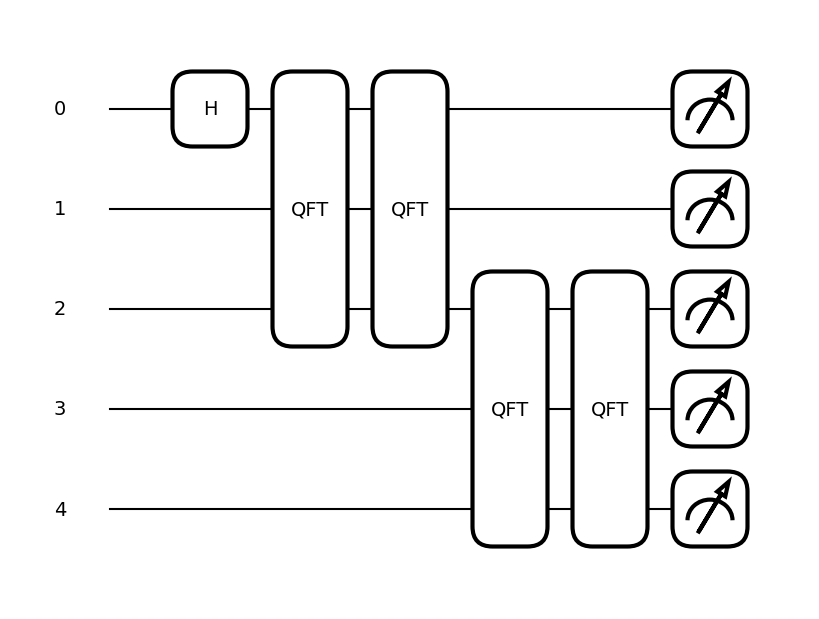

In [130]:
import pennylane as qml
# Criação do dispositivo quântico
dev = qml.device("default.qubit", wires=5, shots=1024)

# Definindo o circuito quântico
@qml.qnode(dev)

def circuit():
    
    qml.Hadamard(wires=[0])
    qml.QFT(wires=[2,1,0])
    qml.QFT(wires=[2,1,0])
    qml.QFT(wires=[4,3,2])
    qml.QFT(wires=[4,3,2])
    

        # qml.adjoint(qml.QFT)(wires=[i,i+1])
        # qml.adjoint(qml.QFT)(wires=[i,i+1])
        
    return qml.counts()

print(circuit())
for op in circuit.tape.operations:
    print(len(op.wires))
fig, ax = qml.draw_mpl(circuit)()
fig.show()

## Reference 
 - https://www.nature.com/articles/s41598-021-01745-x